In [ ]:
import cv2img

In [ ]:
cv2img.mains(imgin="certs\\1.jpeg", imgout="cert1")

{'status': 'Succeeded', 'recognitionResults': [{'page': 1, 'clockwiseOrientation': 359.19, 'width': 1156, 'height': 534, 'unit': 'pixel', 'lines': [{'boundingBox': [365, 75, 565, 76, 564, 87, 364, 86], 'text': "SAKESHWAR GRAMIN VIKAS SEVA SANSTHA'S", 'words': [{'boundingBox': [367, 76, 424, 76, 424, 86, 367, 86], 'text': 'SAKESHWAR'}, {'boundingBox': [426, 76, 461, 76, 461, 86, 426, 86], 'text': 'GRAMIN'}, {'boundingBox': [463, 76, 490, 76, 489, 86, 463, 86], 'text': 'VIKAS'}, {'boundingBox': [492, 76, 514, 76, 514, 87, 491, 86], 'text': 'SEVA'}, {'boundingBox': [516, 76, 565, 76, 564, 87, 516, 87], 'text': "SANSTHA'S"}]}, {'boundingBox': [296, 91, 630, 92, 629, 116, 295, 115], 'text': 'SAU. SUNDARBAI MANIK ADSUL POLYTECHNIC', 'words': [{'boundingBox': [299, 93, 334, 94, 334, 115, 299, 115], 'text': 'SAU.'}, {'boundingBox': [338, 94, 425, 94, 424, 115, 338, 115], 'text': 'SUNDARBAI'}, {'boundingBox': [429, 94, 478, 94, 478, 115, 428, 115], 'text': 'MANIK'}, {'boundingBox': [482, 94, 52

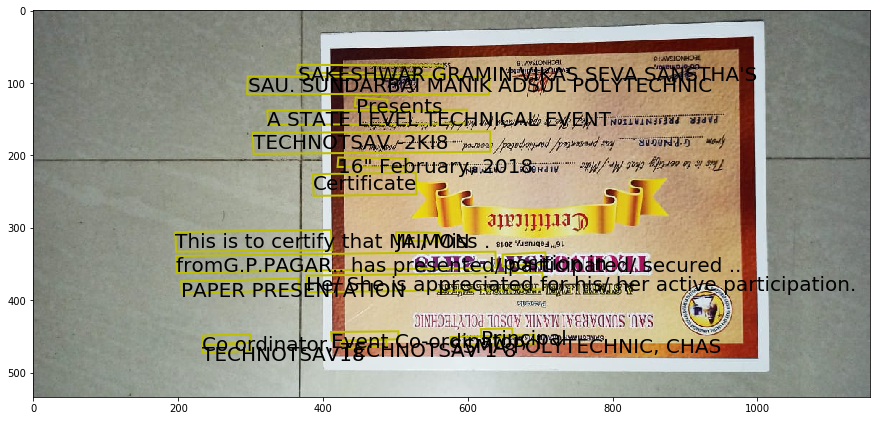

In [22]:
import os
import sys
import requests
import time
# If you are using a Jupyter notebook, uncomment the following line.
# %matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Add your Computer Vision subscription key and endpoint to your environment variables.
if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ['COMPUTER_VISION_SUBSCRIPTION_KEY']
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()

if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ['COMPUTER_VISION_ENDPOINT']

text_recognition_url = endpoint + "/v2.1/read/core/asyncBatchAnalyze"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://raw.githubusercontent.com/gpnagar/Img-to-txt-v1/master/certs/11.jpeg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, json=data)
response.raise_for_status()

# Extracting text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    print(analysis)
    time.sleep(1)
    if ("recognitionResults" in analysis):
        poll = False
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll = False

polygons = []
if ("recognitionResults" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
                for line in analysis["recognitionResults"][0]["lines"]]

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
                for i in range(0, len(polygon[0]), 2)]
    text = polygon[1]
    patch = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")